<a href="https://colab.research.google.com/github/Riyanadi120802/Belajar-Python/blob/main/Riyan_Latihan_Gambar_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Package

In [4]:
import os 
import cv2 as cv
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import zipfile
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Extract File zip

In [4]:
!unzip /content/archive.zip

Archive:  /content/archive.zip
replace Shoe vs Sandal vs Boot Dataset/Boot/boot (1).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

## Augmentasi dan Data Generator

In [5]:
directory = '/content/Shoe vs Sandal vs Boot Dataset'

datagen = ImageDataGenerator(
    rescale=1./255.0,
    shear_range= 0.2,
    validation_split=0.2, # kita menambahkan line ini untuk validation split
    horizontal_flip=True,
    vertical_flip=True
)

train_im = datagen.flow_from_directory(
    directory,
    batch_size=8,
    target_size=(128,128),
    class_mode="categorical",
    subset="training"
)

val_im = datagen.flow_from_directory(
    directory,
    batch_size=8,
    target_size=(128,128),
    class_mode="categorical",
    subset="validation",
)

Found 12000 images belonging to 3 classes.
Found 3000 images belonging to 3 classes.


## Visualisasi Gambar setelah di Augmentasi

(8, 128, 128, 3)


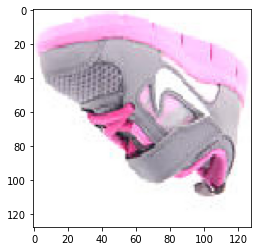

(8, 128, 128, 3)


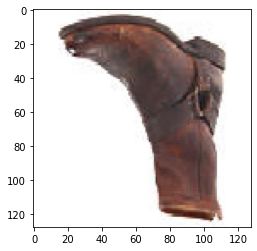

(8, 128, 128, 3)


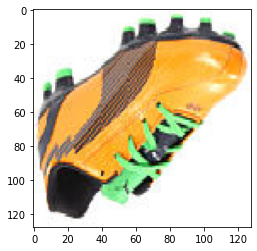

(8, 128, 128, 3)


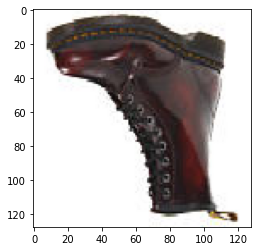

(8, 128, 128, 3)


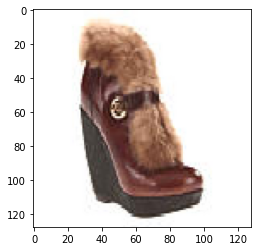

In [6]:
for i in range(5):
    img, label = train_im.next()
    print(img.shape) 
    plt.imshow(img[0])
    plt.show()

In [7]:
img, l = train_im.next()
print(img.shape[1:])

(128, 128, 3)


##NN

In [ ]:
# model = tf.keras.Sequential([
#     tf.keras.layers.Input((128,128,3)),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dense(256, activation='relu'),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(units=3, activation='softmax')
# ]) 

# model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# model.summary()

In [ ]:
# history = model.fit(
#     train_im,
#     validation_data=val_im,
#     epochs=10,
#     steps_per_epoch=50,
# )

# CNN
![image.png](attachment:e5c83917-c435-47c0-9169-c5915dff8538.png)

<b>What is Convolution Operation?</b>
* We have some image and feature detector(3*3)
* Feature detector does not need to be 3 by 3 matrix. It can be 5 by 5 or 7 by 7.
* Feature detector = kernel = filter
* Feauture detector detects features like edges or convex shapes. Example, if out input is dog, feature detector can detect features like ear or tail of the dog.
* feature map = conv(input image, feature detector). Element wise multiplication of matrices.
* feature map = convolved feature
* Stride = navigating in input image.
* We reduce the size of image. This is important bc code runs faster. However, we lost information.
* We create multiple feature maps bc we use multiple feature detectors(filters).
* Lets look at gimp. Edge detect: [0,10,0],[10,-4,10],[0,10,0]

![image.png](attachment:1e27a611-c762-4617-ba89-62997d25fed3.png)
* After having convolution layer we use ReLU to break up linearity. Increase nonlinearity. Because images are non linear.
![image.png](attachment:1986e8dd-56bb-4b21-a566-ff7c96e83e3b.png)

<b>Max Pooling</b>
* It makes down-sampling or sub-sampling (Reduces the number of parameters)
* It makes the detection of features invariant to scale or orientation changes.
* It reduce the amount of parameters and computation in the network, and hence to also control overfitting.

![image.png](attachment:f0b4e64b-1e78-4a88-967c-4fbc59ba471d.png)

![image.png](attachment:f0e0ea67-71d2-45c2-bc8b-1ad733b6b39a.png)


<b>Full Connection</b>
* Neurons in a fully connected layer have connections to all activations in the previous layer

![image.png](attachment:91409e6d-49a5-4033-801d-68866c053fd8.png)

<b>Dropout</b>
* Dropout is a technique where randomly selected neurons are ignored during training
* The Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting. Inputs not set to 0 are scaled up by 1/(1 - rate) such that the sum over all inputs is unchanged.
![image.png](attachment:88b191ea-cb46-4abe-ab68-00e9f489262d.png)

In [8]:
model = Sequential()

#layer 1 CNN
model.add(Conv2D(filters = 16, kernel_size = (5,5),padding = 'Same',
                 activation ='relu', kernel_initializer="he_normal", input_shape = (128,128,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


#layer 2 CNN
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu', kernel_initializer="he_normal"))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

#layer 3 CNN
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',
                 activation ='relu', kernel_initializer="he_normal"))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

# fully connected
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dense(3, activation = "softmax"))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 16)      1216      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 64, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        12832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 32, 32, 32)        0

In [23]:
history = model.fit(
    train_im,
    validation_data=val_im,
    epochs=10,
    steps_per_epoch=100,
    batch_size=64
)

Epoch 1/10
100/100 [==============================] - 71s 715ms/step - loss: 0.1958 - accuracy: 0.9262 - val_loss: 0.1678 - val_accuracy: 0.9447
Epoch 2/10
100/100 [==============================] - 69s 697ms/step - loss: 0.1622 - accuracy: 0.9400 - val_loss: 0.1836 - val_accuracy: 0.9380
Epoch 3/10
100/100 [==============================] - 71s 710ms/step - loss: 0.1470 - accuracy: 0.9525 - val_loss: 0.1358 - val_accuracy: 0.9513
Epoch 4/10
100/100 [==============================] - 69s 691ms/step - loss: 0.1442 - accuracy: 0.9362 - val_loss: 0.1883 - val_accuracy: 0.9327
Epoch 5/10
100/100 [==============================] - 69s 694ms/step - loss: 0.1448 - accuracy: 0.9500 - val_loss: 0.1279 - val_accuracy: 0.9563
Epoch 6/10
100/100 [==============================] - 71s 710ms/step - loss: 0.1486 - accuracy: 0.9438 - val_loss: 0.1536 - val_accuracy: 0.9430
Epoch 7/10
100/100 [==============================] - 69s 698ms/step - loss: 0.1182 - accuracy: 0.9525 - val_loss: 0.1863 - val_ac

In [26]:
get_ac = history.history['accuracy']
get_los = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

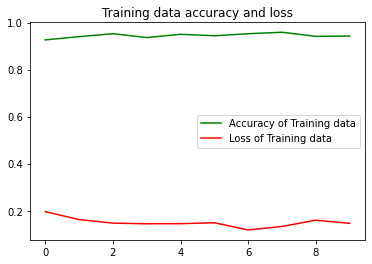

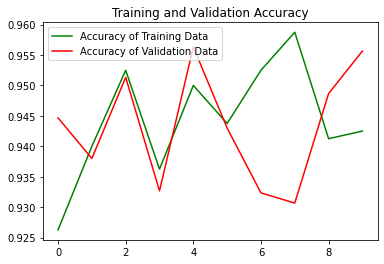

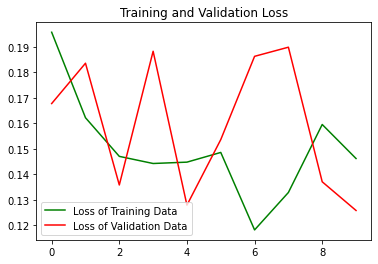

<Figure size 432x288 with 0 Axes>

In [27]:
epochs = range(len(get_ac))
plt.plot(epochs, get_ac, 'g', label='Accuracy of Training data')
plt.plot(epochs, get_los, 'r', label='Loss of Training data')
plt.title('Training data accuracy and loss')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, get_ac, 'g', label='Accuracy of Training Data')
plt.plot(epochs, val_acc, 'r', label='Accuracy of Validation Data')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, get_los, 'g', label='Loss of Training Data')
plt.plot(epochs, val_loss, 'r', label='Loss of Validation Data')
plt.title('Training and Validation Loss')
plt.legend(loc=0)
plt.figure()
plt.show()

## Model Evaluate

In [30]:
loss, accuracy = model.evaluate(train_im)

1500/1500 [==============================] - 179s 120ms/step - loss: 0.1240 - accuracy: 0.9597
